# Import Libraries

In [23]:
import pandas as pd

import re

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

import keras_tuner as kt

from keras.models import Sequential

from keras.layers import Dense,Dropout,BatchNormalization

import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Data Gathering

In [2]:
import os
os.chdir("D:Dataset/")

In [3]:
df=pd.read_csv('news.csv')
df

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1
...,...,...
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1


# EDA

In [4]:
df.head(10)

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1
5,JetNation FanDuel League; Week 4,0
6,Kansas Tried a Tax Plan Similar to Trump’s. It...,1
7,"India RBI chief: growth important, but not at ...",1
8,EPA chief to sign rule on Clean Power Plan exi...,1
9,Talks on sale of Air Berlin planes to easyJet ...,1


In [5]:
df.tail()

,Headline,Label
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1
4008,Vice President Mike Pence Leaves NFL Game Beca...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  4009 non-null   object
 1   Label     4009 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.8+ KB


In [7]:
df.columns

Index(['Headline', 'Label'], dtype='object')

# PreProcessing

In [8]:
pre=[]

for i in df['Headline']:
    s=i.lower()
    s1=re.sub('[^A-Za-z0-9]',' ',s)
    pre.append(s1)

In [9]:
pre[0:10]

['four ways bob corker skewered donald trump',
 'linklater s war veteran comedy speaks to modern america  says star',
 'trump s fight with corker jeopardizes his legislative agenda',
 'egypt s cheiron wins tie up with pemex for mexican onshore oil field',
 'jason aldean opens  snl  with vegas tribute',
 'jetnation fanduel league  week 4',
 'kansas tried a tax plan similar to trump s  it failed ',
 'india rbi chief  growth important  but not at cost of inflation   newspaper',
 'epa chief to sign rule on clean power plan exit on tuesday',
 'talks on sale of air berlin planes to easyjet at risk of collapse  report']

In [10]:
df['Headlines']=pre

In [11]:
df

,Headline,Label,Headlines
0,Four ways Bob Corker skewered Donald Trump,1,four ways bob corker skewered donald trump
1,Linklater's war veteran comedy speaks to moder...,1,linklater s war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...,1,trump s fight with corker jeopardizes his legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,egypt s cheiron wins tie up with pemex for mex...
4,Jason Aldean opens 'SNL' with Vegas tribute,1,jason aldean opens snl with vegas tribute
...,...,...,...
4004,Trends to Watch,0,trends to watch
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,trump jr is soon to give a 30 minute speech f...
4006,"Ron Paul on Trump, Anarchism & the AltRight",0,ron paul on trump anarchism the altright
4007,China to accept overseas trial data in bid to ...,1,china to accept overseas trial data in bid to ...


In [12]:
df.drop(['Headline'],axis=1)

,Label,Headlines
0,1,four ways bob corker skewered donald trump
1,1,linklater s war veteran comedy speaks to moder...
2,1,trump s fight with corker jeopardizes his legi...
3,1,egypt s cheiron wins tie up with pemex for mex...
4,1,jason aldean opens snl with vegas tribute
...,...,...
4004,0,trends to watch
4005,0,trump jr is soon to give a 30 minute speech f...
4006,0,ron paul on trump anarchism the altright
4007,1,china to accept overseas trial data in bid to ...


# Define x and y

In [13]:
x=df['Headlines']
y=df['Label']

In [14]:
x

0              four ways bob corker skewered donald trump
1       linklater s war veteran comedy speaks to moder...
2       trump s fight with corker jeopardizes his legi...
3       egypt s cheiron wins tie up with pemex for mex...
4             jason aldean opens  snl  with vegas tribute
                              ...                        
4004                                      trends to watch
4005    trump jr  is soon to give a 30 minute speech f...
4006          ron paul on trump  anarchism   the altright
4007    china to accept overseas trial data in bid to ...
4008    vice president mike pence leaves nfl game beca...
Name: Headlines, Length: 4009, dtype: object

In [15]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

# Vectorization

In [16]:
tf=TfidfVectorizer()

In [17]:
x1=tf.fit_transform(x).toarray()

In [18]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Split the Data

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=23)

# Keras Tuner

In [20]:
def build_model(hp):
    nn=Sequential()
    
    #INPUT LAYER:-
    u1=hp.Int('unit1',min_value=64,max_value=1024,step=64)
    
    #HIDDEN LAYER:-
    u2=hp.Int('unit2',min_value=64,max_value=1024,step=64)
    u3=hp.Int('unit3',min_value=64,max_value=1024,step=64)
    u4=hp.Int('unit4',min_value=64,max_value=1024,step=64)
    u5=hp.Int('unit5',min_value=64,max_value=1024,step=64)
    u6=hp.Int('unit6',min_value=64,max_value=1024,step=64)
    u7=hp.Int('unit7',min_value=64,max_value=1024,step=64)
    
    
    
    
    
    nn.add(Dense(units=u1,input_dim=x_train.shape[1],activation='relu'))
    nn.add(Dense(units=u2,activation='relu'))
    nn.add(Dense(units=u3,activation='relu'))
    nn.add(Dense(units=u4,activation='relu'))
    nn.add(Dense(units=u5,activation='relu'))
    nn.add(Dense(units=u6,activation='relu'))
    nn.add(Dense(units=u7,activation='relu'))
    
    
    
    
    
    nn.add(Dense(1,activation='sigmoid'))
    
    nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return nn

In [25]:
tuner=kt.Hyperband(build_model,
                  objective='val_loss',
                  max_epochs=5,
                  directory='tuner1',
                  project_name='tuner_demo7711')

In [26]:
tuner.search(x_train,y_train,epochs=20,validation_split=0.2)

Trial 10 Complete [00h 01m 35s]
val_loss: 0.3934929072856903

Best val_loss So Far: 0.31679093837738037
Total elapsed time: 00h 09m 08s


In [27]:
tuner.get_best_hyperparameters()[0].get('unit1')

896

In [28]:
tuner.get_best_hyperparameters()[0].get('unit2')

1024

In [29]:
tuner.get_best_hyperparameters()[0].get('unit3')

256

In [30]:
tuner.get_best_hyperparameters()[0].get('unit4')

192

In [31]:
tuner.get_best_hyperparameters()[0].get('unit5')

832

In [32]:
tuner.get_best_hyperparameters()[0].get('unit6')

960

In [33]:
tuner.get_best_hyperparameters()[0].get('unit7')

512

# Model Building

In [34]:
nn=Sequential()

In [35]:
#INPUT LAYER:-

nn.add(Dense(896,input_dim=x_train.shape[1],activation='relu'))




nn.add(Dense(1024,activation='relu'))
nn.add(Dense(256,activation='relu'))
nn.add(Dense(192,activation='relu'))
nn.add(Dense(832,activation='relu'))
nn.add(Dense(960,activation='relu'))
nn.add(Dense(512,activation='relu'))


nn.add(Dense(1,activation='sigmoid'))

# Compile the Model

In [36]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# CallBacks

In [37]:
Early=EarlyStopping(monitor='val_loss',patience=5)

# Fitting the Model

In [38]:
hist=nn.fit(x_train,y_train,validation_split=0.2,callbacks=[Early],epochs=30)

Epoch 1/30
81/81 [==============================] - 20s 174ms/step - loss: 0.5513 - accuracy: 0.6947 - val_loss: 0.3538 - val_accuracy: 0.8660
Epoch 2/30
81/81 [==============================] - 12s 146ms/step - loss: 0.0739 - accuracy: 0.9766 - val_loss: 0.3905 - val_accuracy: 0.8536
Epoch 3/30
81/81 [==============================] - 12s 151ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.8440 - val_accuracy: 0.8629
Epoch 4/30
81/81 [==============================] - 14s 178ms/step - loss: 3.1233e-05 - accuracy: 1.0000 - val_loss: 0.9791 - val_accuracy: 0.8598
Epoch 5/30
81/81 [==============================] - 14s 170ms/step - loss: 9.7345e-07 - accuracy: 1.0000 - val_loss: 0.9894 - val_accuracy: 0.8598
Epoch 6/30
81/81 [==============================] - 13s 164ms/step - loss: 8.2509e-07 - accuracy: 1.0000 - val_loss: 0.9982 - val_accuracy: 0.8598


# Plot the Result

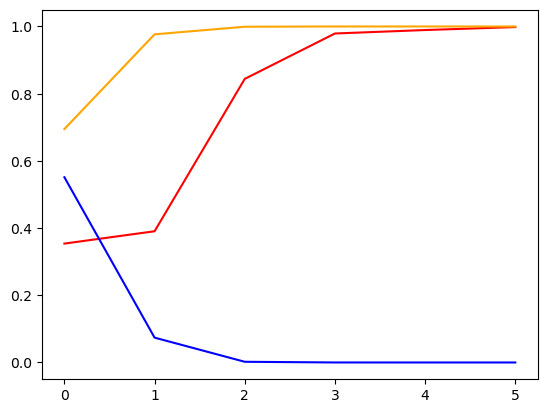

In [39]:
plt.plot(hist.history['val_loss'],c='red')
plt.plot(hist.history['loss'],c='blue')
plt.plot(hist.history['accuracy'],c='orange')

# Evaluation of Training Data

In [40]:
y_tr=nn.predict(x_train)
y_tr

101/101 [==============================] - 5s 22ms/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [1.2807768e-08],
       ...,
       [1.4557021e-05],
       [9.7120088e-01],
       [1.0000000e+00]], dtype=float32)

In [41]:
y_pred_train=[]

for i in y_tr:
    if i>0.5:
        y_pred_train.append(1)
    else:
        y_pred_train.append(0)

In [42]:
acc=accuracy_score(y_pred_train,y_train)
print('Accuracy:',acc)
print('*'*50)

clf=classification_report(y_pred_train,y_train)
print('Classification_Report:\n',clf)
print('*'*50)

cnf=confusion_matrix(y_pred_train,y_train)
print('Confusion_Matrix:\n',cnf)
print('*'*50)

Accuracy: 0.9719363891487371
**************************************************
Classification_Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1683
           1       0.97      0.97      0.97      1524

    accuracy                           0.97      3207
   macro avg       0.97      0.97      0.97      3207
weighted avg       0.97      0.97      0.97      3207

**************************************************
Confusion_Matrix:
 [[1645   38]
 [  52 1472]]
**************************************************


# Evaluation of Testing Data

In [43]:
y_ts=nn.predict(x_test)

26/26 [==============================] - 1s 22ms/step


In [44]:
y_pred=[]

for i in y_ts:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [45]:
acc1=accuracy_score(y_pred,y_test)
print('Accuracy:',acc1)
print('*'*50)

clf1=classification_report(y_pred,y_test)
print('Classification_Report:\n',clf1)
print('*'*50)

cnf1=confusion_matrix(y_pred,y_test)
print('Confusion_Matrix:\n',cnf1)
print('*'*50)

Accuracy: 0.8466334164588528
**************************************************
Classification_Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       407
           1       0.88      0.80      0.84       395

    accuracy                           0.85       802
   macro avg       0.85      0.85      0.85       802
weighted avg       0.85      0.85      0.85       802

**************************************************
Confusion_Matrix:
 [[362  45]
 [ 78 317]]
**************************************************


# Unseen Data

In [94]:
text = input('Enter Headline: ')




def preprocess_text(text):
    text_lower = text.lower()                                                          
    text_clean = re.sub('[^A-Za-z0-9]', ' ', text_lower)                               
    return text_clean



processed_text = preprocess_text(text)                         


vectorizer=tf.transform([processed_text]).toarray()                                   


predictions = nn.predict(vectorizer)[0]



if predictions == 1:
    print('POSITIVE HEADLINE')
else:
    print('NEGATIVE HEADLINE')

Enter Headline: "Cryptocurrency Market Hits New Highs: What's Driving the Surge?"
1/1 [==============================] - 0s 74ms/step
POSITIVE HEADLINE
